<a href="https://colab.research.google.com/github/jdmartinev/MachineLearning/blob/main/Talleres/2b_Deteccion_de_anomalias_IF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Taller 2b: Detección de anomalías con Isolation Forest


In [8]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.pipeline import Pipeline

random_state = 1234

In [9]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e' -O creditcard.pkl

--2024-03-05 00:23:15--  https://docs.google.com/uc?export=download&id=1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e
Resolving docs.google.com (docs.google.com)... 142.251.132.142, 2800:3f0:4005:40d::200e
Connecting to docs.google.com (docs.google.com)|142.251.132.142|:443... connected.


HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e&export=download [following]
--2024-03-05 00:23:16--  https://drive.usercontent.google.com/download?id=1jQ0c0R9lPUGmqHjwbxlwqvYBmor6Bf-e&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.78.161, 2800:3f0:4005:40b::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.78.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70633109 (67M) [application/octet-stream]
Saving to: ‘creditcard.pkl’

creditcard.pkl      100%[===================>]  67.36M  32.4MB/s    in 2.1s    

2024-03-05 00:23:22 (32.4 MB/s) - ‘creditcard.pkl’ saved [70633109/70633109]



In [10]:
# Cargamos los datos
df = pd.read_pickle("creditcard.pkl")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class
0    284315
1       492
Name: count, dtype: int64


<Axes: xlabel='Class'>

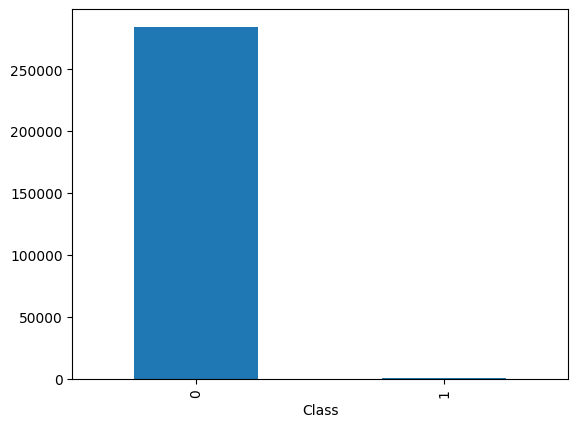

In [11]:
# Exploramos la variable objetivo
print(df.Class.value_counts())
df.Class.value_counts().plot(kind="bar")

In [12]:
# Separemos nuestros datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns="Class"),
    df["Class"],
    test_size=0.2,
    stratify=df["Class"],
    random_state=random_state,
)

In [13]:
# Entrenaremos un classificador RandomForest para resolver este problema
rf_base = RandomForestClassifier(random_state=random_state)

pipeline_rf = Pipeline(
    steps=[
        ("classifier", rf_base),
    ]
)

# Definamos la malla de parámetros sobre la que haremos la búsqueda:
param_grid = {
    "classifier__n_estimators": [50, 100],
    "classifier__max_depth": list(range(2, 8)),
    "classifier__min_samples_leaf": [1, 10, 50],
}

# Definamos nuestros modelo mediante GridSearchCV:
rf = GridSearchCV(pipeline_rf, param_grid=param_grid)

In [14]:
# Entrenemos el random forest:
rf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=1234))]),
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 7],
                         'classifier__min_samples_leaf': [1, 10, 50],
                         'classifier__n_estimators': [50, 100]})

In [15]:
rf.best_params_

{'classifier__max_depth': 7,
 'classifier__min_samples_leaf': 1,
 'classifier__n_estimators': 50}

In [16]:
# Obtengamos la accuracy y el F1 score de entrenamiento
print("Training set")
print(f"Accuracy: {rf.score(X_train, y_train)}")
print(f"F1 score: {f1_score(y_train, rf.predict(X_train), average='macro')}")
print("\n")

Training set
Accuracy: 0.9996576620070662
F1 score: 0.9452924324533584




In [17]:
# Obtengamos la accuracy y el F1 score de prueba para cada modelo:
print("Test set")
print(f"Accuracy: {rf.score(X_test, y_test)}")
print(f"F1 score: {f1_score(y_test, rf.predict(X_test), average='macro')}")
print("\n")

Test set
Accuracy: 0.9995962220427653
F1 score: 0.9363629832748375




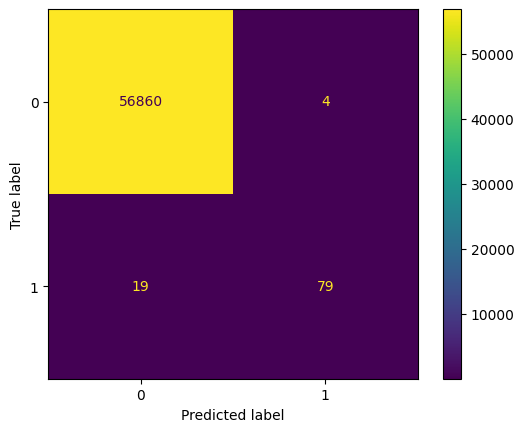

In [18]:
# Grafiquemos la matriz de confusión del random foresr para los datos de prueba (sin normalizar):
cm = confusion_matrix(y_test, rf.predict(X_test))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [19]:
# Ahora, entrenemos un modelo basado en Isolation Forest
# Tip: Isolation forest de sklearn devuelve -1 para outliers y 1 para inliers.
# Por esta razón, se deben mapear los -1 devueltos por el modelo para poder calcular
# las métricas de validación que se utilizan
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score

# Entrenar el modelo Isolation Forest
iso_forest = IsolationForest(random_state=random_state)
iso_forest.fit(X_train)

# Mapear las predicciones (-1 para outliers y 1 para inliers) a 0 y 1
y_train_iso_mapped = (iso_forest.predict(X_train) + 1) // 2
y_test_iso_mapped = (iso_forest.predict(X_test) + 1) // 2

In [20]:
# Calcular el accuracy y F1 score de Isolation Forest en los conjuntos de entrenamiento y test
print("Isolation Forest Training set")
print(f"Accuracy: {accuracy_score(y_train, y_train_iso_mapped)}")
print(f"F1 score: {f1_score(y_train, y_train_iso_mapped, average='macro')}")
print("\n")

print("Isolation Forest Test set")
print(f"Accuracy: {accuracy_score(y_test, y_test_iso_mapped)}")
print(f"F1 score: {f1_score(y_test, y_test_iso_mapped, average='macro')}")
print("\n")

Isolation Forest Training set
Accuracy: 0.037424564945467316
F1 score: 0.03611290094844597


Isolation Forest Test set
Accuracy: 0.03618201608089604
F1 score: 0.0349599846951178




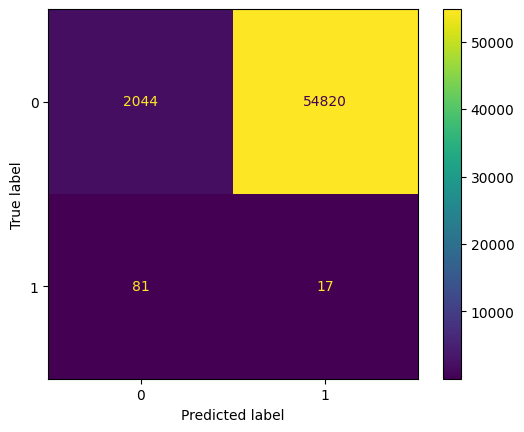

In [21]:
# Graficar la matriz de confusión para Isolation Forest
cm_iso_forest = confusion_matrix(y_test, y_test_iso_mapped)
disp_iso_forest = ConfusionMatrixDisplay(cm_iso_forest)
disp_iso_forest.plot()
plt.show()